# Heart Disease Classification


## Abstract
Data classification can often be applied to medical data, helping detect the prevalence of disease. 

The following analysis predicts the prevalence of heart disease from a dataset drawn from four different sources: the Cleveland Clinic Foundation, the Hungarian Institute of Cardiology, Budapest and the University Hospital, Zurich, Switzerland and is drawn from the UCI Machine Learning Repository. This project focuses on the classification of heart disease by using several machine learning algorithms, such as random forests, kth-nearest neighbors, support vector machine and logistic regression. The analysis implements Python and Python libraries including these algorithms to come up with a model that best predicts the diagnosis (0 = not present, 1 = present). Through the investigation, we will find which algorithm most effectively and consistently predicts the presence of heart disease.

We will examine 11 out of 76 total attributes, including age, sex, chest pain type, resting blood pressure, cholesterol level, etc.


### Import Modules
We begin by importing python modules. 

In [16]:
import numpy as np
from urllib.request import urlopen
import urllib
import matplotlib.pyplot as plt # Visuals
import seaborn as sns 
import sklearn as skl
import pandas as pd

from sklearn.cross_validation import train_test_split # Create training and test sets
from sklearn.neighbors import KNeighborsClassifier # Kth Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier # Decision Trees
from sklearn.tree import export_graphviz # Extract Decision Tree visual
from sklearn.tree import tree 
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import svm #SVM
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # AUC 
from sklearn.model_selection import KFold, cross_val_score #cross validation 
from sklearn import cross_validation  #cross validation 
from urllib.request import urlopen # Get data from UCI Machine Learning Repository

import plotly.graph_objs as go
import plotly.plotly as py
import plotly.tools as pt
plt.style.use('ggplot')
pt.set_credentials_file(username='rboone125', api_key='')

### Import Data

We imported the data directly from the UCI Machine Learning Repository website.
Because we are working with three different datasets, we decided to merge the data into one array. 

Here is a short output of the data, just the first five rows. 

In [27]:
Cleveland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Hungarian_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Switzerland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
np.set_printoptions(threshold=np.nan) #see a whole array when we output it

names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
ClevelandHeartDisease = pd.read_csv(urlopen(Cleveland_data_URL), names = names) #gets Cleveland data
HungarianHeartDisease = pd.read_csv(urlopen(Hungarian_data_URL), names = names) #gets Hungary data
SwitzerlandHeartDisease = pd.read_csv(urlopen(Switzerland_data_URL), names = names) #gets Switzerland data
datatemp = [ClevelandHeartDisease, HungarianHeartDisease, SwitzerlandHeartDisease] #combines all arrays into a list

heartDisease = pd.concat(datatemp)#combines list into one array
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,28,1,2,130,132,0,2,185,0,0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0,?,?,?,0


## Exploratory Analysis 

Let's start with the exploratory analysis of our dataset. 
We don't want to predict on all the variables from the original data so we are getting rid of 'ca', 'slope', and 'thal'. For the variables we kept, there are still some "?" in the data, so we're going to replace them with a NAN. 

We can also see the data types of the variables in the data set. This way, we can differentiate between discrete or categorical representations of our variables. Although the entire set is numerical, some outputs of the datatypes are objects. 


In [28]:
del heartDisease['ca']
del heartDisease['slope']
del heartDisease['thal']

heartDisease = heartDisease.replace('?', np.nan)
heartDisease.dtypes

age              int64
sex              int64
cp               int64
trestbps        object
chol            object
fbs             object
restecg         object
thalach         object
exang           object
oldpeak         object
heartdisease     int64
dtype: object

In [29]:
#loop to count the "?" per variable. More for interpretation. 

count = 0
for item in heartDisease:
    for i in heartDisease[item]:
        count += (i == '?')

### Class Imbalance
This is a function from another project by Ravi. This tests for class imbalance in the data, but since we are going to simplify the data later, this shouldn't be an issue. But let's check anyway.

Class Imbalance refers to when a class within a data set is outnumbered by the other class (or classes). Class Imbalance is present when a class populates 10-20% of the data set. We can see that is a problem here! :(  

In [30]:
def classImbalance(item):
    item_0 = 0
    item_1 = 0
    item_2 = 0
    item_3 = 0
    item_4 = 0
    item_5 = 0
    for item_i in heartDisease[item]:
        for i in range(0,6):
            if (item == i):
                item_i +=1
    heartDisease_i = 0
    for i in  range (0,6):
        heartDisease_i = (item_i/len(heartDisease)) * 100
        print("The percentage of level", i, "in the response variable is: {0:.2f}".format(heartDisease_i)) 
 
classImbalance('heartdisease')

The percentage of level 0 in the response variable is: 0.14
The percentage of level 1 in the response variable is: 0.14
The percentage of level 2 in the response variable is: 0.14
The percentage of level 3 in the response variable is: 0.14
The percentage of level 4 in the response variable is: 0.14
The percentage of level 5 in the response variable is: 0.14


In [21]:
trace0 = go.Box(
    y=heartDisease['age'],
    name='age'
)
trace1 = go.Box(
    y=heartDisease['sex'],
    name='sex'
)
trace2 = go.Box(
    y=heartDisease['cp'],
    name='cp'
)
trace3 = go.Box(
    y=heartDisease['trestbps'],
    name='trestbps'
)
trace4 = go.Box(
    y=heartDisease['chol'],
    name='chol'
)
trace5 = go.Box(
    y=heartDisease['fbs'],
    name='fbs'
)
trace6 = go.Box(
    y=heartDisease['restecg'],
    name='restecg'
)
trace7 = go.Box(
    y=heartDisease['thalach'],
    name='thalach'
)
trace8 = go.Box(
    y=heartDisease['exang'],
    name='exang'
)
trace9 = go.Box(
    y=heartDisease['oldpeak'],
    name='oldpeak'
)
trace10 = go.Box(
    y=heartDisease['heartdisease'],
    name='heart disease status'
)
plotdata = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]
py.iplot(plotdata)

PlotlyRequestError: Aw, snap! You tried to use our API as the user 'rboone125', but the supplied API key doesn't match our records. You can view your API key at plot.ly/settings.

You're most likely getting this message because your local credentials file isn't synced with the Plotly server you're communicating with.

Go to plot.ly/<language>/getting-started (e.g., plot.ly/python/getting-started) for more information.

Make sure that you're logged in as rboone125.

Need help? Please try searching Plotly's <a href='http://stackoverflow.com/questions/tagged/plotly'>Stack Overflow channel</a>.

## Preprocessing
### Normalizing Data

Everything else seems okay. So we begin the preprocessing of th data.
All of our data is numerical, so we are going to standardize the variables to approach our analysis more objectively. In doing so, the data is scaled to be only between 0 and 1, to objectify the distribution.  


In [31]:
for item in heartDisease: #converts everything to floats
    heartDisease[item] = pd.to_numeric(heartDisease[item])

def normalize(heartDisease, toNormalize): #normalizes 
    result = heartDisease.copy()
    for item in heartDisease.columns:
        if (item in toNormalize):
            max_value = heartDisease[item].max()
            min_value = heartDisease[item].min()
            result[item] = (heartDisease[item] - min_value) / (max_value - min_value)
    return result
toNormalize = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak'] #columns to normalize
heartDisease = normalize(heartDisease, toNormalize)
heartDisease = heartDisease.dropna()
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,0.000000,1,0.333333,0.416667,0.218905,0.0,2.0,0.961538,0.0,0.342105,0
1,0.021739,1,0.333333,0.333333,0.402985,0.0,0.0,0.769231,0.0,0.342105,0
3,0.043478,0,0.000000,0.750000,0.393035,0.0,1.0,0.846154,0.0,0.342105,0
4,0.065217,0,0.333333,0.166667,0.363184,0.0,1.0,0.692308,0.0,0.342105,0
5,0.086957,0,0.333333,0.208333,0.328358,0.0,0.0,0.807692,0.0,0.342105,0


This is a classification problem, so to simplify our project we are going to convert the predictor column into 1 for "heart disease is present" and 0 for "heart disease is not present."

Before, the scope of the disease ran from 0 - 5 for the intensity of the heart disease but this shit's too hard so we're going to replace it.

In [32]:
for i in range(1,5):
    heartDisease['heartdisease'] = heartDisease['heartdisease'].replace(i,1)


###### Boxplot visualization of the Transformed Dataset and the Distribution of the Attributes 

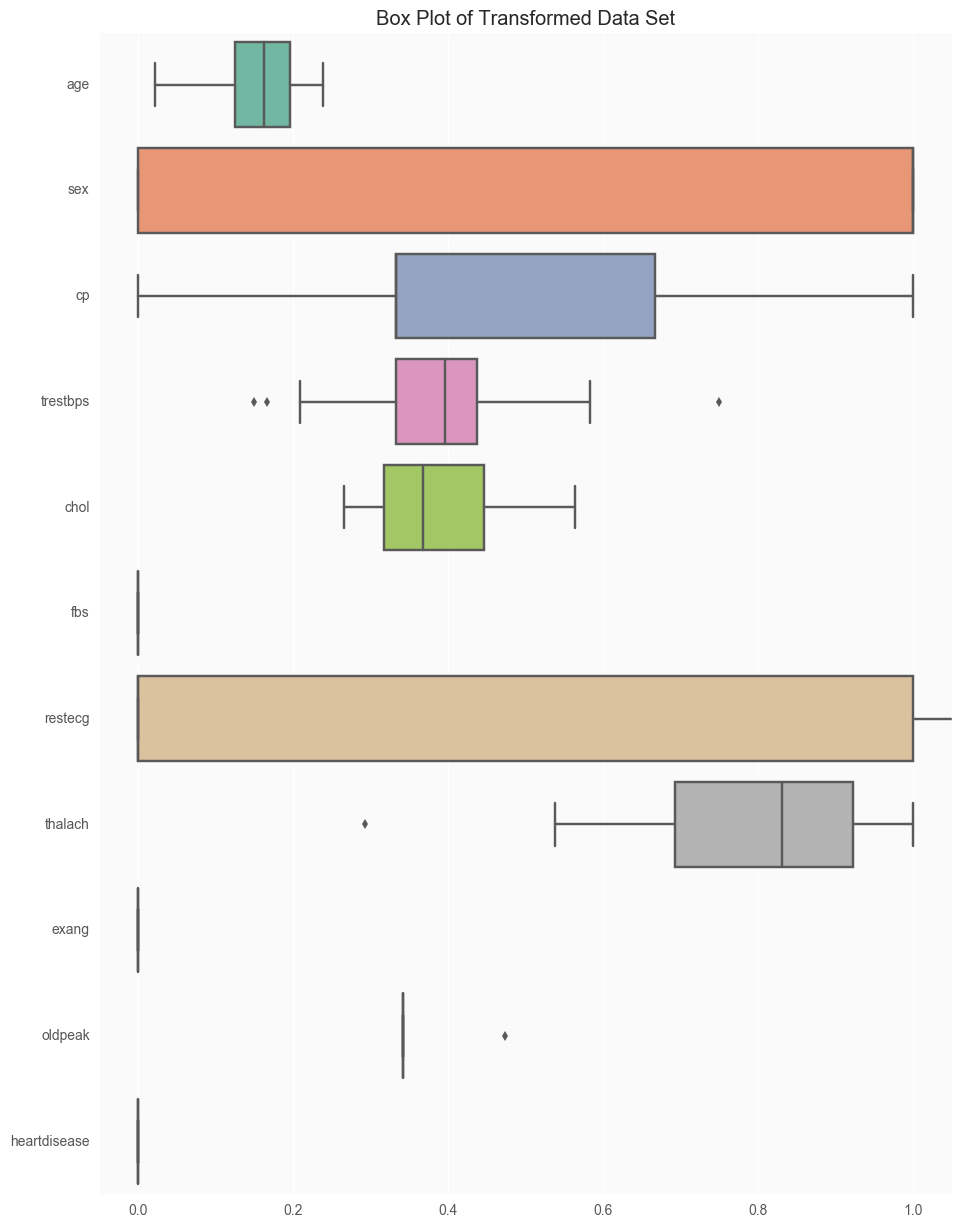

In [33]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
plt.title("Box Plot of Transformed Data Set")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = heartDisease[1:29], orient = 'h', palette = 'Set2')
plt.show()

In [34]:
trace0 = go.Box(
    y=heartDisease['age'],
    name='age'
)
trace1 = go.Box(
    y=heartDisease['sex'],
    name='sex'
)
trace2 = go.Box(
    y=heartDisease['cp'],
    name='cp'
)
trace3 = go.Box(
    y=heartDisease['trestbps'],
    name='trestbps'
)
trace4 = go.Box(
    y=heartDisease['chol'],
    name='chol'
)
trace5 = go.Box(
    y=heartDisease['fbs'],
    name='fbs'
)
trace6 = go.Box(
    y=heartDisease['restecg'],
    name='restecg'
)
trace7 = go.Box(
    y=heartDisease['thalach'],
    name='thalach'
)
trace8 = go.Box(
    y=heartDisease['exang'],
    name='exang'
)
trace9 = go.Box(
    y=heartDisease['oldpeak'],
    name='oldpeak'
)
trace10 = go.Box(
    y=heartDisease['heartdisease'],
    name='heart disease status'
)
plotdata = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]
py.iplot(plotdata)

PlotlyRequestError: Aw, snap! You tried to use our API as the user 'rboone125', but the supplied API key doesn't match our records. You can view your API key at plot.ly/settings.

You're most likely getting this message because your local credentials file isn't synced with the Plotly server you're communicating with.

Go to plot.ly/<language>/getting-started (e.g., plot.ly/python/getting-started) for more information.

Make sure that you're logged in as rboone125.

Need help? Please try searching Plotly's <a href='http://stackoverflow.com/questions/tagged/plotly'>Stack Overflow channel</a>.

## Model Estimation
### Training and Testing 

Whoooo!!! Let's play with some algorithms. First, split the data into training and test sets. 

In [35]:
train, test = train_test_split(heartDisease, test_size = 0.20, random_state = 42)
# Create the training test omitting the diagnosis

training_set = train.ix[:, train.columns != 'heartdisease']
# Next we create the class set 
class_set = train.ix[:, train.columns == 'heartdisease']

# Next we create the test set doing the same process as the training set
test_set = test.ix[:, test.columns != 'heartdisease']
test_class_set = test.ix[:, test.columns == 'heartdisease']


### Decision Trees

Decision trees have a hierarchical structure, where each leaf of the tree represents a class label while the branches represent represent the process the tree used to deduce the class labels. 


In [36]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(train[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']], train['heartdisease'])
predictions_dt = dt.predict(test[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']])
predictright = 0
predictions_dt.shape[0]
for i in range(0,predictions_dt.shape[0]-1):
    if (predictions_dt[i]== test.iloc[i][10]):
        predictright +=1
accuracy = predictright/predictions_dt.shape[0]
accuracy

0.9649122807017544

The accuracy for a decision tree is 95.64%. This is high, but I want to see if we can get higher with a random forest. 

In [37]:
print("Table comparing actual vs. predicted values for our test set:\n",
     pd.crosstab(predictions_dt, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

Table comparing actual vs. predicted values for our test set:
 Actual Values      0   1
Predicted Values        
0                 64   3
1                  0  47


In [38]:
#ROC curve calculation 
fpr2, tpr2, _ = roc_curve(predictions_dt, test_class_set)

#AUC curve calcuation
auc_dt = auc(fpr2, tpr2)

#### Note on ROC and AUC curves
###### Receiver Operating Characteristc Curve calculations 
The function roc_curve is for calculating the False Positive Rates and True Positive Rates for each model. 
The Area under the Curve was also calculated (in this case the curves are the ROC Curves). These are going to be calculated for each model so we can fit a graph to visualize which model ends up working best for the data. 

### Random Forest

A random forest is an entire forest of random decision trees. This will perform better than just a single tree because it corrects the problem of overfitting. 

Decision Trees tend to have low bias and high variance, a process known as Bagging Trees (Bootstrap Aggregating). Random Forest aims to reduce this correlation by choosing only a subsample of the feature space at each split. Essentially aiming to make the trees more independent and thus reducing the variance.


##### Tree Concepts 
+ Single Decision Tree (Single tree)
+ Bagging Trees (Multiple trees) [Model with all features, M, considered at splits, where M = all features]
+ Random Forest (Multiple trees) [Model with m features considered at splits, where m < M]

In [39]:
fitRF = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)

In [40]:
fitRF.fit(training_set, class_set['heartdisease'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

We have to gather the variable importance. This is essential in decision trees and random forests for seeing which attributes played an important role in our algorithm. 

In [41]:
importancesRF = fitRF.feature_importances_
indicesRF = np.argsort(importancesRF)[::-1]
indicesRF

array([2, 8, 9, 4, 7, 0, 3, 1, 6, 5])

##### Gini impurity 
Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini impurity can be computed by summing the probability fi of an item with label i being chosen times the probability 1- fi of a mistake in categorizing that item. 

It reaches its minimum (zero) when all cases in the node fall into a single target category. Here we compute the importance of each gini impurity and plot it. 

In [42]:
namesInd = names[:11]
print("Feature ranking:")

for f in range(10):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, 
                                                                namesInd[indicesRF[i]], 
                                                                importancesRF[indicesRF[f]]))

Feature ranking:
1. The feature 'cp' has a Gini Importance of 0.195424
2. The feature 'exang' has a Gini Importance of 0.165684
3. The feature 'oldpeak' has a Gini Importance of 0.152049
4. The feature 'chol' has a Gini Importance of 0.143879
5. The feature 'thalach' has a Gini Importance of 0.118047
6. The feature 'age' has a Gini Importance of 0.083195
7. The feature 'trestbps' has a Gini Importance of 0.072504
8. The feature 'sex' has a Gini Importance of 0.035457
9. The feature 'restecg' has a Gini Importance of 0.020557
10. The feature 'fbs' has a Gini Importance of 0.013205


In [45]:
feature_space = []
for i in range(9, -1, -1):
    feature_space.append(namesInd[indicesRF[i]])

Print the accuracy of the random forest. 


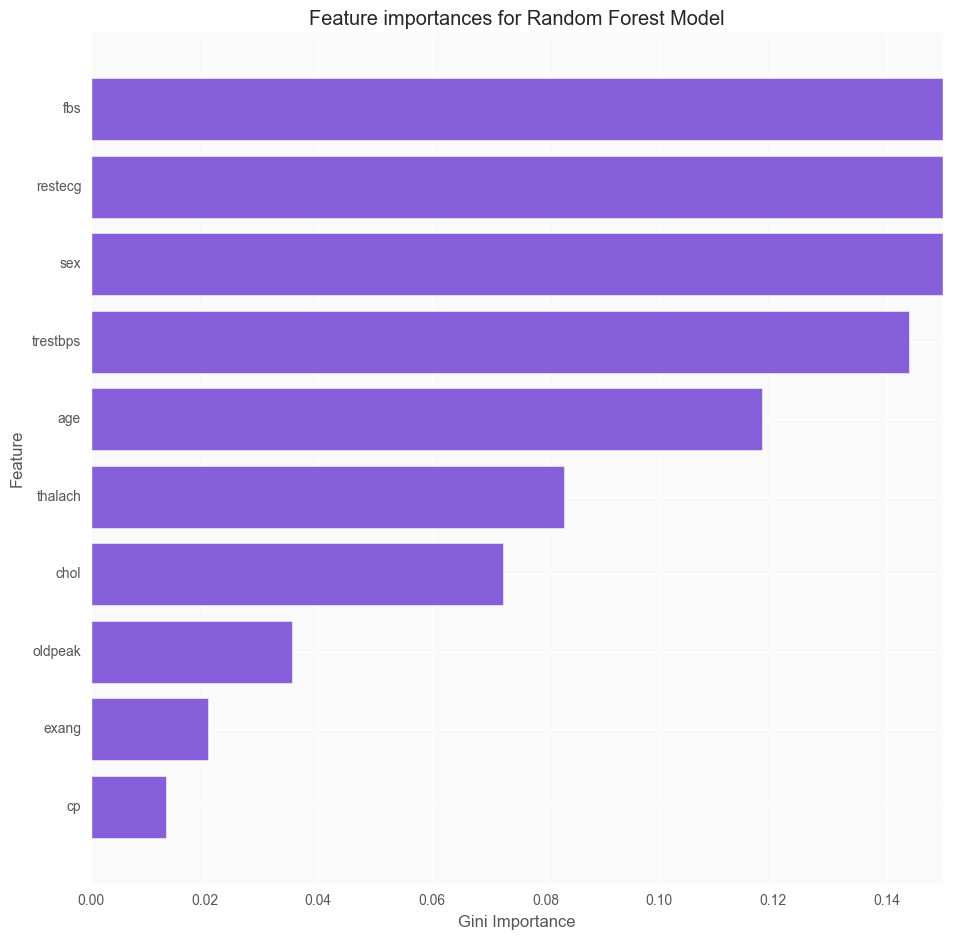

In [46]:
indRf = sorted(importancesRF) #sort into decreasing order 
index = np.arange(10) #arrange the importance

f, ax = plt.subplots(figsize=(11, 11))

ax.set_axis_bgcolor('#fafafa')
plt.title('Feature importances for Random Forest Model')
plt.barh(index, indRf,
    	align="center", 
    	color = '#875FDB')
plt.yticks(index, ('cp', 'exang', 'oldpeak', 'chol', 'thalach', 'age', 'trestbps', 'sex', 'restecg', 'fbs'))
plt.ylim(-1, 10)
plt.xlim(0, 0.15)
plt.xlabel('Gini Importance')
plt.ylabel('Feature')

plt.show()

In [47]:
predictions_RF = fitRF.predict(test_set)
print(pd.crosstab(predictions_RF, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

Actual Values      0   1
Predicted Values        
0                 64   4
1                  0  46


In [48]:
accuracy_RF = fitRF.score(test_set, test_class_set['heartdisease'])

print("Here is our mean accuracy on the test set:\n",
     '%.3f' % (accuracy_RF * 100), '%')

Here is our mean accuracy on the test set:
 96.491 %


We have a 96.491% accuracy, which is pretty high for an accuracy. 

In [49]:
# Here we calculate the test error rate!
test_error_rate_RF = 1 - accuracy_RF
print("The test error rate for our model is:\n",
     '%.3f' % (test_error_rate_RF * 100), '%')

The test error rate for our model is:
 3.509 %


In [50]:
#ROC curve calculation
fpr1, tpr1, _ = roc_curve(predictions_RF, test_class_set)
#AUC curve calcuation
auc_rf = auc(fpr1, tpr1)

Since random forests are an extension of decision trees, we will soon see that the ROC curve is very similar in accuracy. 


### Support Vector Machine
SVM is a supervised machine learning algorithm where each data item is plotted as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Classification is done by finding the hyper-plane that differentiates between the two classes very well. 

In [24]:
svmtest = svm.SVC()
svmfit = svmtest.fit(train[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']], train['heartdisease'])
svmPredictions = svmtest.predict(test[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']])
predictrightsvm = 0
for i in range(0,svmPredictions.shape[0]-1):
    if (svmPredictions[i]== test.iloc[i][10]):
        predictrightsvm +=1
rightpercentsvm = predictrightsvm/svmPredictions.shape[0]
rightpercentsvm

0.7280701754385965

Here our accuracy is about 72.8%, which is not as high as the previous algorithms. 

In [25]:
predictions_svm = svmfit.predict(test_set)
print(pd.crosstab(predictions_svm, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

Actual Values      0   1
Predicted Values        
0                 54  20
1                 10  30


In [26]:
#ROC curve calculation
fpr4, tpr4, _ = roc_curve(predictions_svm, test_class_set)
#AUC curve calcuation
auc_svm = auc(fpr4, tpr4)

### Kth Nearest Neighbors 

Kth nearest neighbor employs Euclidean Distance (a.k.a straight-line distance between two points) based on the specified k. For this data in particular, there are 10 neighbors closest to the value it is trying to classify. This is a simpler algorithm, but gives context to the idea that often simpler is better! 


In [27]:
heartDiseaseKnn = KNeighborsClassifier(n_neighbors=10)

In [28]:
heartDiseaseKnn.fit(training_set, class_set['heartdisease'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [29]:
# We predict the class for our training set
predictionsTrain = heartDiseaseKnn.predict(training_set) 

# Here we create a matrix comparing the actual values vs. the predicted values
print(pd.crosstab(predictionsTrain, class_set['heartdisease'], 
                  rownames=['Predicted Values'], colnames=['Actual Values']))

# Measure the accuracy based on the trianing set
accuracyTrain = heartDiseaseKnn.score(training_set, class_set['heartdisease'])

print("Here is our accuracy for our training set:")
print('%.3f' % (accuracyTrain * 100), '%')

Actual Values       0    1
Predicted Values          
0                 246   69
1                  17  122
Here is our accuracy for our training set:
81.057 %


In [30]:
print("The train error rate for our model is:")
train_error_rate = 1 - accuracyTrain  
print('%.3f' % (train_error_rate * 100), '%')

The train error rate for our model is:
18.943 %


Apply to test set. 

In [31]:
# First we predict the Dx for the test set and call it predictions
predictions = heartDiseaseKnn.predict(test_set)

# Let's compare the predictions vs. the actual values
print(pd.crosstab(predictions, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

# Let's get the accuracy of our test set
accuracy = heartDiseaseKnn.score(test_set, test_class_set['heartdisease'])

# TEST ERROR RATE!!
print("Here is our accuracy for our test set:")
print('%.3f' % (accuracy * 100), '%')

Actual Values      0   1
Predicted Values        
0                 55  21
1                  9  29
Here is our accuracy for our test set:
73.684 %


We get an accuracy of 73.68%. This is actually the worst algorithm that's been used so far. 

In [32]:
n = KFold(n_splits=3)

scores = cross_val_score(heartDiseaseKnn, 
                         test_set, 
                         test_class_set['heartdisease'], cv = n)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

Accuracy: 0.75 (+/- 0.03)


In [33]:
fpr3, tpr3, _ = roc_curve(predictions, test_class_set)
auc_knn = auc(fpr3, tpr3)

### ROC CURVE
The ideal ROC curve follows the X axis at 0 and the Y axis at 1. The closer the model is to this fit, the stronger the algorithm. We can see that here, using random forest trees generated the best fit. 

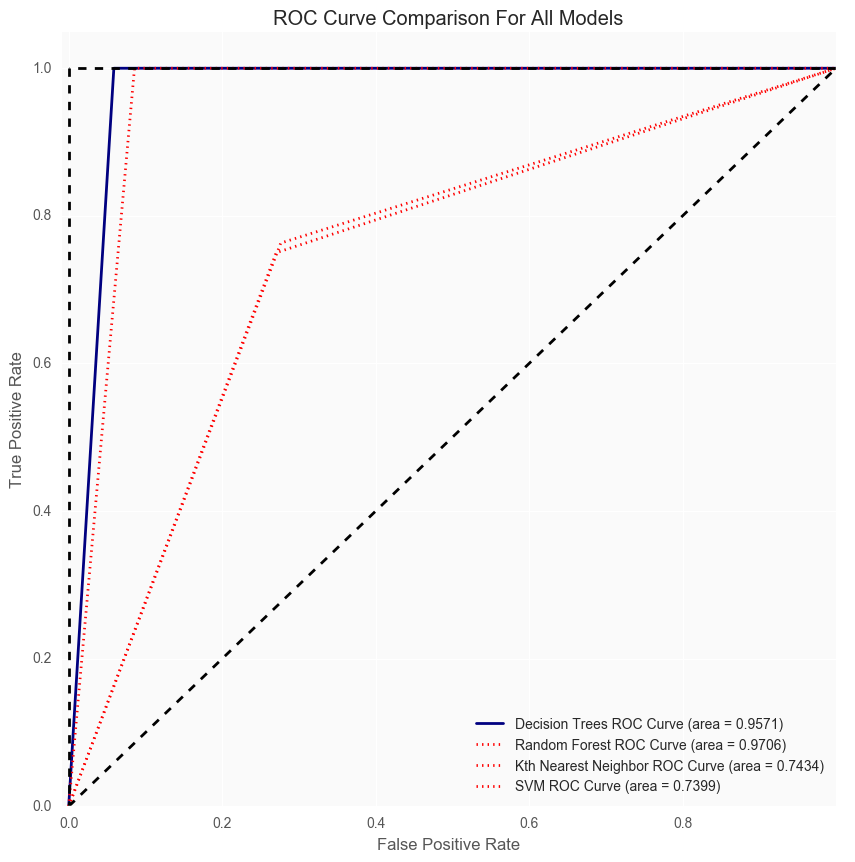

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(fpr1, tpr1,label='Decision Trees ROC Curve (area = %.4f)' % auc_dt, 
         color = 'navy', 
         linewidth=2)
plt.plot(fpr2, tpr2,label='Random Forest ROC Curve (area = %.4f)' % auc_rf, 
         color = 'red', 
         linestyle=':', 
         linewidth=2)
plt.plot(fpr3, tpr3,label='Kth Nearest Neighbor ROC Curve (area = %.4f)' % auc_knn, 
         color = 'red', 
         linestyle=':', 
         linewidth=2)
plt.plot(fpr4, tpr4,label='SVM ROC Curve (area = %.4f)' % auc_svm, 
         color = 'red', 
         linestyle=':', 
         linewidth=2)

ax.set_axis_bgcolor('#fafafa')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison For All Models')
plt.legend(loc="lower right")

plt.show()

#### Second Iteration of the ROC curve using Plotly to work on Inertia7

In [39]:
lw = 2

trace1 = go.Scatter(x=fpr1, y=tpr1, 
                    mode='lines', 
                    line=dict(color='darkorange', width=lw),
                    name='Decision Tree ROC curve (area = %0.4f)' % auc_dt
                   )

trace2 = go.Scatter(x=fpr2, y=tpr2, 
                    mode='lines', 
                    line=dict(color='red', width=lw),
                    name= 'Random Forest ROC curve (area = %0.4f)' % auc_rf
                   )

trace3 = go.Scatter(x=fpr3, y=tpr3, 
                    mode='lines', 
                    line=dict(color='blue', width=lw),
                    name= 'Kth Nearest Neighbor ROC curve (area = %0.2f)' % auc_knn
                   )


trace4 = go.Scatter(x=fpr4, y=tpr4, 
                    mode='lines', 
                    line=dict(color='green', width=lw),
                    name='SVM ROC curve (area = %0.2f)' % auc_svm
                   )

layout = go.Layout(title='Receiver operating characteristic example',
                   xaxis=dict(title='False Positive Rate'),
                   yaxis=dict(title='True Positive Rate'))

fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
py.iplot(fig)

## Conclusions

Using random forests has produced the best performances in test error rate and having true positives/true negatives, and I highly doubt that I will find an algorithm that performs better than that. 

By messing around with data and applying different algorithms, we have so many tools at our hands that can predict the presence of disease for the future. I'm not really into biostatistics or anything like that, but this project is still super handy and I definitely learned a lot doing it. Also thanks Ravi for your breast cancer project cause it was actually a huge inspiration and helped guide this one a lot. You're probably the only person who checks out my Github so thanks!!! :) 

| Model/Algorithm | Test Accuracy Rate | Area under the Curve for ROC |
|-----------------|-----------------|--------------------------------------------|----------------|
| Decision Trees | 95.64% | 0.9706 | 
| Random Forest| 96.491% | 0.9706 | 
| Support Vector Machine| 72.81% | 0.7399 | 
| Kth Nearest Neighobrs| 73.68% | 0.7434 | 
